<a href="https://colab.research.google.com/github/Somtochukwu-Achikanu/Machine-learning-handson/blob/main/Logistic_Regression_using_statsmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression for Binary reponse or Target variables

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

In [2]:
has_churned = pd.read_csv('/content/churn.csv')
print(has_churned.head())

   has_churned  time_since_first_purchase  time_since_last_purchase
0            0                  -1.089221                 -0.721322
1            0                   1.182983                  3.634435
2            0                  -0.846156                 -0.427582
3            0                   0.086942                 -0.535672
4            0                  -1.166642                 -0.672640


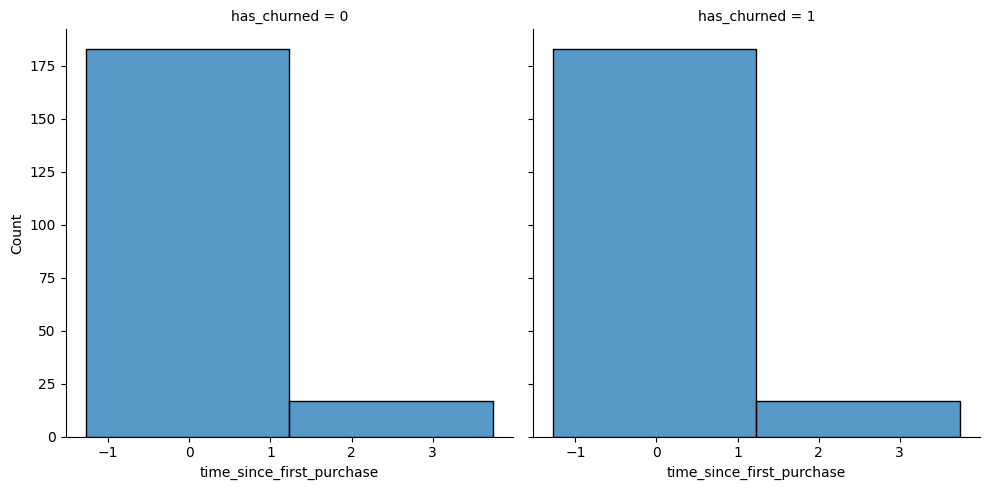

In [3]:
sns.displot(x='time_since_first_purchase', col='has_churned', col_wrap=2,data=has_churned,bins=2)
plt.show()

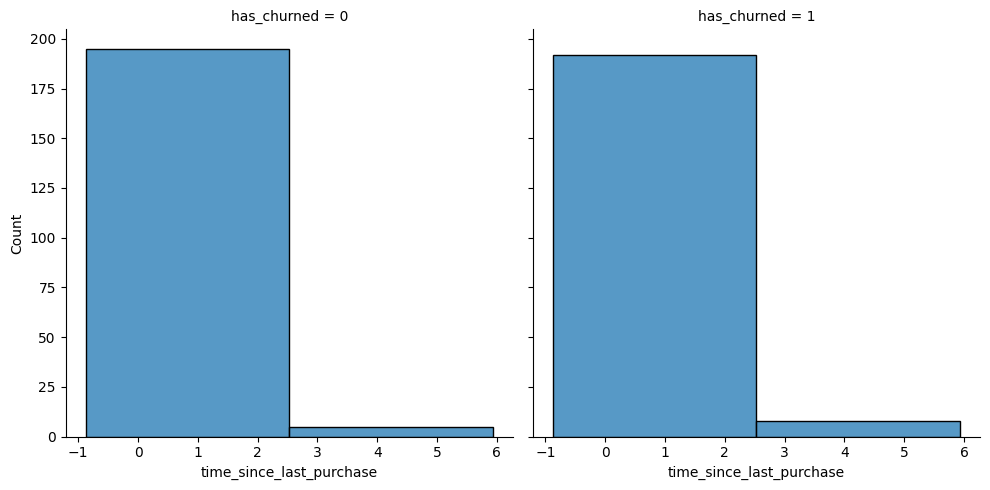

In [4]:
sns.displot(x='time_since_last_purchase', col='has_churned', col_wrap=2,data=has_churned,bins=2)
plt.show()

## #Linear Model for the two different explanatory variables

Intercept                    0.497062
time_since_first_purchase   -0.085478
dtype: float64


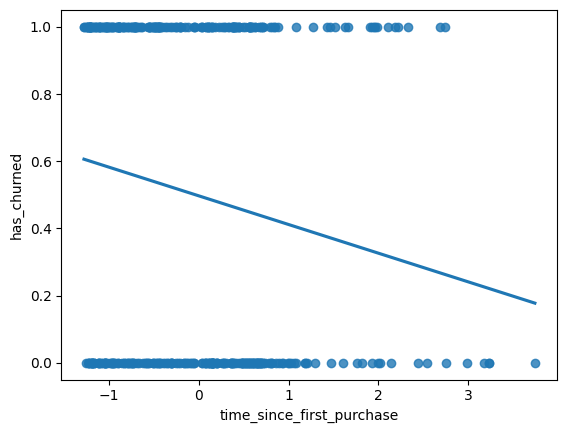

In [5]:
#Churned vs time since first purchase

churned_vs_first_purchase = ols('has_churned ~ time_since_first_purchase', data=has_churned).fit()
print(churned_vs_first_purchase.params)

#Visualisation
sns.regplot(x='time_since_first_purchase',y='has_churned',data=has_churned,ci=None)
plt.show()

Intercept                   0.490780
time_since_last_purchase    0.063783
dtype: float64


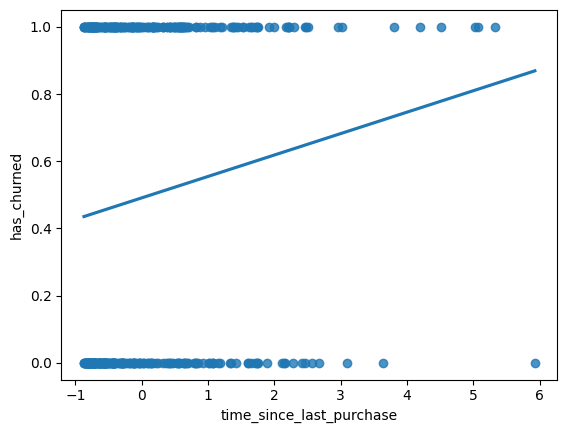

In [6]:
#Churned vs time since last purchase
churned_vs_last_purchase = ols('has_churned ~ time_since_last_purchase', data=has_churned).fit()
print(churned_vs_last_purchase.params)

#Visualisation
sns.regplot(x='time_since_last_purchase',y='has_churned',data=has_churned,ci=None)
plt.show()

# Logistic Regression

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
Intercept                   -0.015185
time_since_first_purchase   -0.354795
dtype: float64


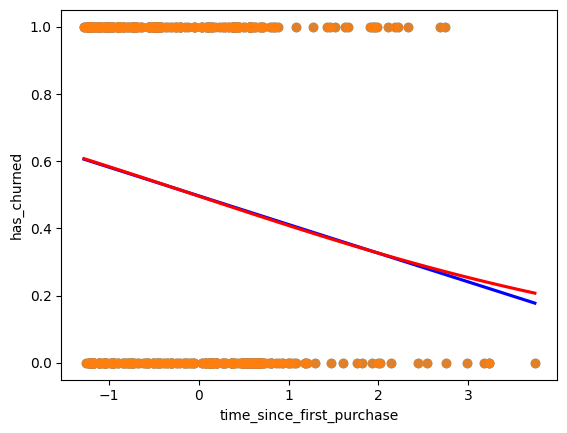

In [7]:
#churned vs time since first purchased

from statsmodels.formula.api import logit

churned_vs_first_purchase_logit = logit('has_churned ~ time_since_first_purchase', data=has_churned).fit()
print(churned_vs_first_purchase_logit.params)

#Visualization
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=has_churned,
            ci=None,
            line_kws={"color": "blue"})
sns.regplot(x='time_since_first_purchase', y='has_churned',data=has_churned,ci=None,logistic=True,line_kws={"color": "red"})
plt.show()

Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4
Intercept                  -0.035019
time_since_last_purchase    0.269215
dtype: float64


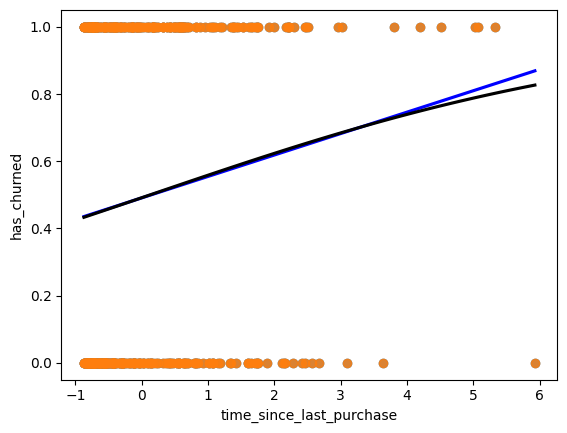

In [8]:
#churned vs time since last purchased

churned_vs_last_purchase_logit = logit('has_churned ~ time_since_last_purchase', data=has_churned).fit()
print(churned_vs_last_purchase_logit.params)


#Visualize
sns.regplot(x="time_since_last_purchase",
            y="has_churned",
            data=has_churned,
            ci=None,
            line_kws={"color": "blue"})
sns.regplot(x='time_since_last_purchase', y='has_churned',data=has_churned,ci=None,logistic=True, line_kws={'color':'black'})
plt.show()

# Predictions

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
   time_since_first_purchase  has_churned
0                      -1.00     0.584096
1                      -0.75     0.562401
2                      -0.50     0.540465
3                      -0.25     0.518370
4                       0.00     0.496204


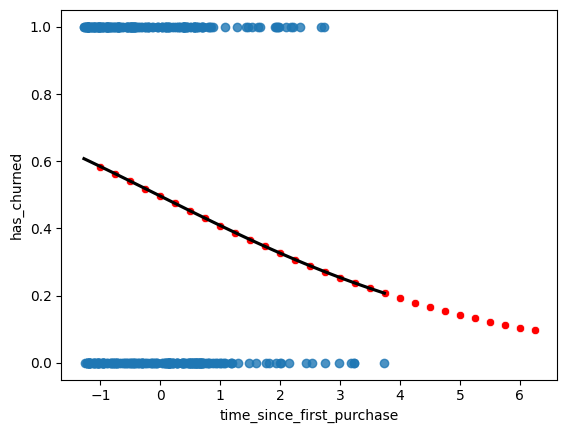

In [9]:
#Making predictions for the has churned using time since first purchase
churned_vs_first_purchase_logit = logit('has_churned ~ time_since_first_purchase', data=has_churned).fit()


#Predict
explanatory_data = pd.DataFrame({'time_since_first_purchase': np.arange(-1,6.5,0.25)})
predict_data = explanatory_data.assign(has_churned = churned_vs_first_purchase_logit.predict(explanatory_data))
print(predict_data.head())

#Visualize
fig = plt.figure()
sns.regplot(x='time_since_first_purchase', y='has_churned',data=has_churned,ci=None,logistic=True, line_kws={'color':'black'})
sns.scatterplot(x='time_since_first_purchase', y='has_churned',data=predict_data,color='red')
plt.show()


Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4
   time_since_last_purchase  has_churned
0                     -1.00     0.424523
1                     -0.75     0.441043
2                     -0.50     0.457695
3                     -0.25     0.474441
4                      0.00     0.491246


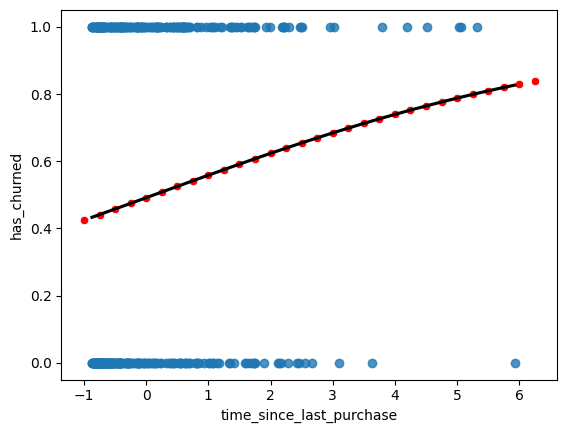

In [10]:
#Making predictions for the has churned using time since first purchase
churned_vs_last_purchase_logit = logit('has_churned ~ time_since_last_purchase', data=has_churned).fit()

#Predict
explanatory_data = pd.DataFrame({'time_since_last_purchase': np.arange(-1,6.5,0.25)})

prediction_data= explanatory_data.assign(has_churned=churned_vs_last_purchase_logit.predict(explanatory_data))
print(prediction_data.head())

#Visualization
fig = plt.figure()
sns.regplot(x='time_since_last_purchase', y='has_churned',data=has_churned,ci=None,logistic=True, line_kws={'color':'black'})
sns.scatterplot(x='time_since_last_purchase', y='has_churned',data=prediction_data,color='red')
plt.show()

### Getting the most likely outcome

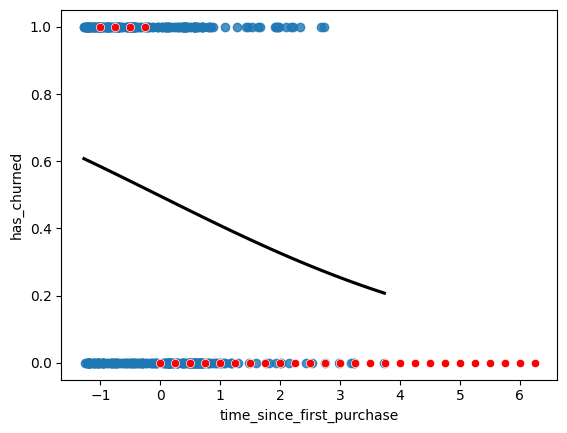

In [11]:
#For time since first purchase

predict_data['most_likely_outcome'] = np.round(predict_data['has_churned'])

#Visualization
fig = plt.figure()
sns.regplot(x='time_since_first_purchase', y='has_churned',data=has_churned,ci=None,logistic=True, line_kws={'color':'black'})
sns.scatterplot(x='time_since_first_purchase',y='most_likely_outcome',data=predict_data,color='red')
plt.show()

Most recent first customers are most likely to not churning

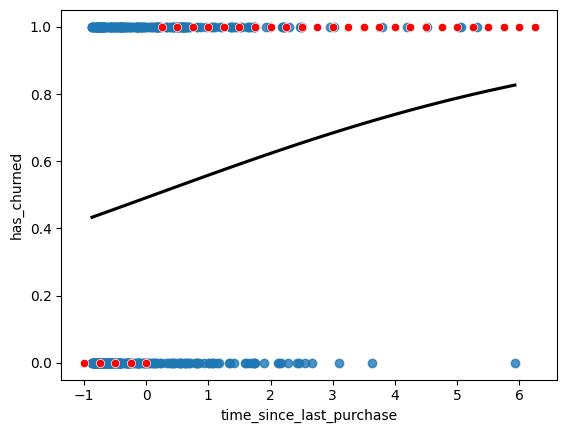

In [12]:
prediction_data['Most_likely_outcome'] = np.round(prediction_data['has_churned'])

#Visualizing most likely outcome
fig = plt.figure()
sns.regplot(x='time_since_last_purchase', y='has_churned',data=has_churned,ci=None,logistic=True, line_kws={'color':'black'})
sns.scatterplot(x='time_since_last_purchase',y='Most_likely_outcome',data=prediction_data,color='red')
plt.show()

For recent active customers, the most likely outcome is that they dont churn but otherwise, they churn

# Calculating odds Ratio

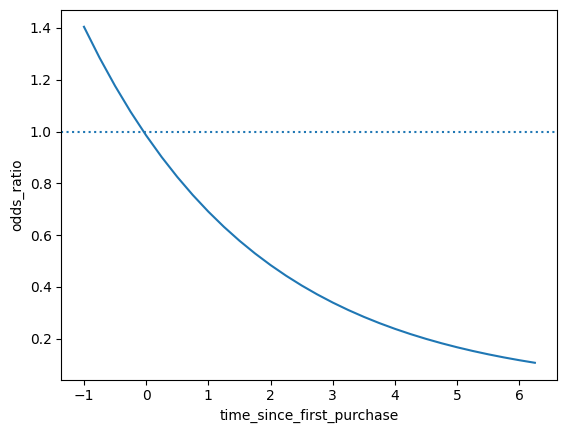

In [13]:
#For since first purchase

predict_data['odds_ratio'] = predict_data['has_churned'] / (1-predict_data['has_churned'])

#Visualization
sns.lineplot(x='time_since_first_purchase',y='odds_ratio',data=predict_data)
plt.axhline(y=1, linestyle='dotted')
plt.show()

In the top-left, the predictions are above one, so the chance of churning is less than the chance of not churning. In the bottom-right, the chance of churning is about five times more than the chance of not churning.

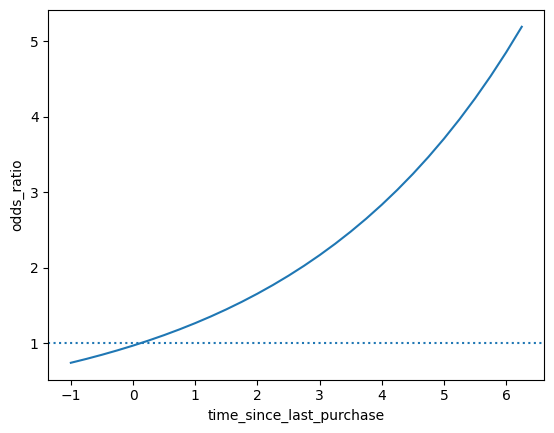

In [14]:
#For since last purchase

prediction_data['odds_ratio'] = prediction_data['has_churned'] / (1 - prediction_data['has_churned'])

#Visualizing it
sns.lineplot(x='time_since_last_purchase',y='odds_ratio',data=prediction_data)
plt.axhline(y=1, linestyle='dotted')
plt.show()

In the bottom-left, the predictions are below one, so the chance of churning is less than the chance of not churning. In the top-right, the chance of churning is about five times more than the chance of not churning.



# Log Odds Ratio

   time_since_first_purchase  has_churned  most_likely_outcome  odds_ratio  \
0                      -1.00     0.584096                  1.0    1.404400   
1                      -0.75     0.562401                  1.0    1.285197   
2                      -0.50     0.540465                  1.0    1.176111   
3                      -0.25     0.518370                  1.0    1.076284   
4                       0.00     0.496204                  0.0    0.984930   

   log_odds_ratio  
0        0.339610  
1        0.250912  
2        0.162213  
3        0.073514  
4       -0.015185  


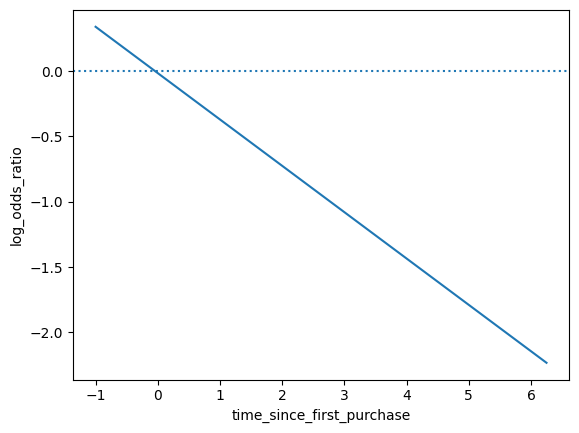

In [15]:
#Calculating the log odds ratio for time since last purchase
predict_data['log_odds_ratio'] = np.log(predict_data['odds_ratio'])
print(predict_data.head())


#Visualization
sns.lineplot(x='time_since_first_purchase',y='log_odds_ratio',data=predict_data)
plt.axhline(y=0, linestyle='dotted')
plt.show()

   time_since_last_purchase  has_churned  Most_likely_outcome  odds_ratio  \
0                     -1.00     0.424523                  0.0    0.737688   
1                     -0.75     0.441043                  0.0    0.789046   
2                     -0.50     0.457695                  0.0    0.843980   
3                     -0.25     0.474441                  0.0    0.902738   
4                      0.00     0.491246                  0.0    0.965587   

   log_odd_ratio  
0      -0.304234  
1      -0.236931  
2      -0.169627  
3      -0.102323  
4      -0.035019  


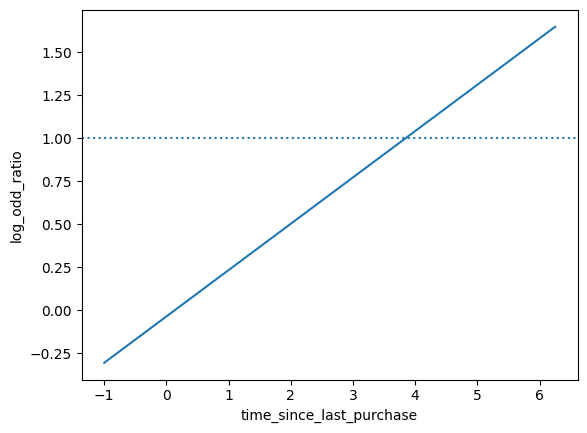

In [16]:
#Calculating the log odds ratio for time since last purchase
prediction_data['log_odd_ratio'] = np.log(prediction_data['odds_ratio'])
print(prediction_data.head())

sns.lineplot(x='time_since_last_purchase',y='log_odd_ratio',data=prediction_data)
plt.axhline(y=1, linestyle='dotted')
plt.show()

# Confusion Matrix

In [23]:
#For the time since first purchase

actual_response = has_churned['has_churned']
predicted_response = np.round(churned_vs_first_purchase_logit.predict()) #predicted values - Probabilities
outcomes = pd.DataFrame({'Actual Responses': actual_response,
                         'Predicted Responses': predicted_response})
print(outcomes.value_counts(sort=False))

#or
confusion_matrix = churned_vs_first_purchase_logit.pred_table()
print(confusion_matrix)

Actual Responses  Predicted Responses
0                 0.0                    112
                  1.0                     88
1                 0.0                     76
                  1.0                    124
dtype: int64
[[112.  88.]
 [ 76. 124.]]


(<Figure size 640x480 with 3 Axes>,
 {('0', '0'): (0.0, 0.0, 0.49751243781094534, 0.5581395348837209),
  ('0', '1'): (0.0,
   0.5614617940199336,
   0.49751243781094534,
   0.4385382059800664),
  ('1', '0'): (0.5024875621890548,
   0.0,
   0.49751243781094534,
   0.3787375415282392),
  ('1', '1'): (0.5024875621890548,
   0.38205980066445183,
   0.49751243781094534,
   0.6179401993355481)})

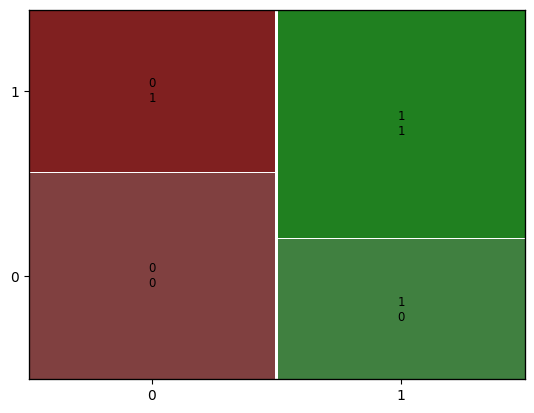

In [25]:
#visualizing the confusion matrix

from statsmodels.graphics.mosaicplot import mosaic

mosaic(confusion_matrix)

112 customers didnt churn, 124 customers churned, 88 customers are false positives and 76 false negatives

In [24]:
#For the time since last purchase
actual_response = has_churned['has_churned']
predicted_response = np.round(churned_vs_last_purchase_logit.predict())
outcomes = pd.DataFrame({'Actual Responses': actual_response,
                         'Predicted Responses': predicted_response})
print(outcomes.value_counts(sort=False))

#or
conf_matrix = churned_vs_last_purchase_logit.pred_table()
print(conf_matrix)

Actual Responses  Predicted Responses
0                 0.0                    141
                  1.0                     59
1                 0.0                    111
                  1.0                     89
dtype: int64
[[141.  59.]
 [111.  89.]]


(<Figure size 640x480 with 3 Axes>,
 {('0', '0'): (0.0, 0.0, 0.49751243781094534, 0.70265780730897),
  ('0', '1'): (0.0,
   0.7059800664451826,
   0.49751243781094534,
   0.2940199335548173),
  ('1', '0'): (0.5024875621890548,
   0.0,
   0.49751243781094534,
   0.553156146179402),
  ('1', '1'): (0.5024875621890548,
   0.5564784053156145,
   0.49751243781094534,
   0.4435215946843853)})

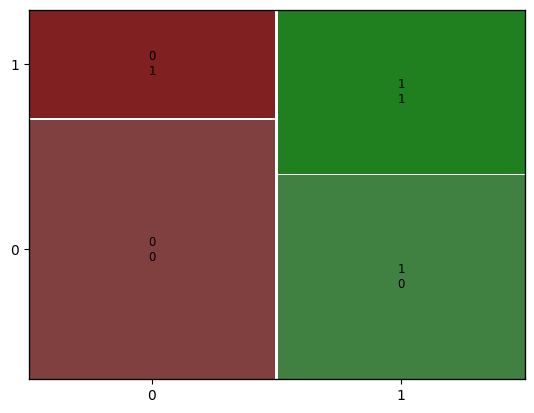

In [26]:
#Visualizing

mosaic(conf_matrix)

141 customers didnt churn, 89 customers churned, 59 false churning(false positives) and 111 false negatives

# Accuracy

In [29]:
#Accuracy for time first purchase model
TN = confusion_matrix[0,0]
TP = confusion_matrix[1,1]
FN = confusion_matrix[1,0]
FP = confusion_matrix[0,1]

accuracy_first = (TN + FN) / (TN+FN+FP+TP)
print(accuracy_first)


0.47


In [28]:
#Accuracy for last time purchased model
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

accuracy_last = (TN + TP)/ (TN + FN + FP + TP)
print(accuracy_last)

0.575


# Sensitivity

In [30]:
#sensitivity for first purchased
TN = confusion_matrix[0,0]
TP = confusion_matrix[1,1]
FN = confusion_matrix[1,0]
FP = confusion_matrix[0,1]

sensitivity_first = TP / (FN + TP)
print(sensitivity_first)

0.62


In [31]:
#sensitivity for last purchased model

TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

sensitivity_last = TP / (FN + TP)
print(sensitivity_last)

0.445


# specificity

In [32]:
#specificity for first purchased
TN = confusion_matrix[0,0]
TP = confusion_matrix[1,1]
FN = confusion_matrix[1,0]
FP = confusion_matrix[0,1]

specificity_first = TN / (TN + FP)
print(specificity_first)

0.56


In [33]:
#specificity for first purchased
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

specificity_last = TN / (TN + FP)
print(specificity_last)

0.705
